In [20]:
import pandas as pd
from analysis import data
import os.path as osp
from matplotlib import pyplot as plt
import csv

known_data_path = osp.join(osp.dirname(data.__file__), "known_performance.csv")
df_known = pd.read_csv(known_data_path)

pred_data_path = osp.join(osp.dirname(data.__file__), "pred_performance.csv")
df_pred = pd.read_csv(pred_data_path)

pred_data_path = osp.join(osp.dirname(data.__file__), "pred_consumption_predictions.csv")
df_predictions = pd.read_csv(pred_data_path)

# historic_consumptions_data_path = osp.join(osp.dirname(data.__file__), "historic_consumptions.csv")
# df_historic_consumptions = pd.read_csv(historic_consumptions_data_path)


In [21]:
df_pred = pd.concat([df_pred, df_predictions], axis=1)

In [22]:
# df_known = pd.concat([df_known, df_historic_consumptions], axis=1)

In [23]:
col_names = ["agent_id",
            "action",
            "electrical_storage_soc",
            "net_electricity_consumption",
            "non_shiftable_load",
            "solar_generation",
            "carbon_intensity",
            "electricity_pricing"]
# historic_col_names = []
# for i in range(10):
#     historic_col_names.append(f"consumption_{i}hours_ago")
#
df_known.columns = col_names # + historic_col_names
pred_col_names = col_names + ["predicted_load", "predicted_solar"]
df_pred.columns = pred_col_names
df_known.head()

,agent_id,action,electrical_storage_soc,net_electricity_consumption,non_shiftable_load,solar_generation,carbon_intensity,electricity_pricing
0,1,0.0,0.0,2.188750e+00,2.188750e+00,0.0,0.170724,0.22
1,2,0.0,0.0,1.009623e-07,1.009623e-07,0.0,0.170724,0.22
2,3,0.0,0.0,2.819150e+00,2.819150e+00,0.0,0.170724,0.22
3,4,0.0,0.0,7.714333e-01,7.714333e-01,0.0,0.170724,0.22
4,0,0.0,0.0,8.511667e-01,8.511667e-01,0.0,0.157319,0.22


In [24]:
building_num_known = 0
building_num_pred = 0
df_known_building = df_known.loc[df_known["agent_id"] == building_num_known]
df_pred_building = df_pred.loc[df_pred["agent_id"] == building_num_pred]

In [25]:
exclude_columns = ["predicted_solar", "agent_id", "carbon_intensity", "electricity_pricing"]
df_known_building = df_known_building[[x for x in col_names if x not in exclude_columns]]
df_pred_building = df_pred_building[[x for x in pred_col_names if x not in exclude_columns]]

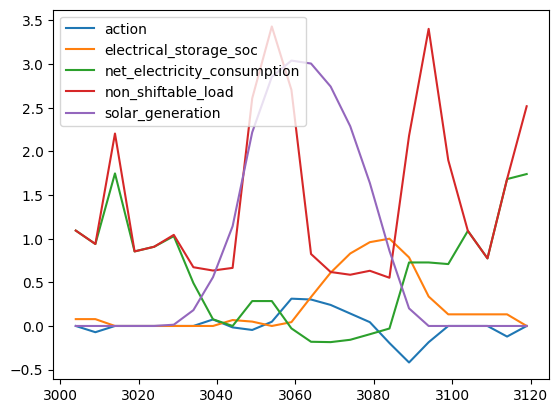

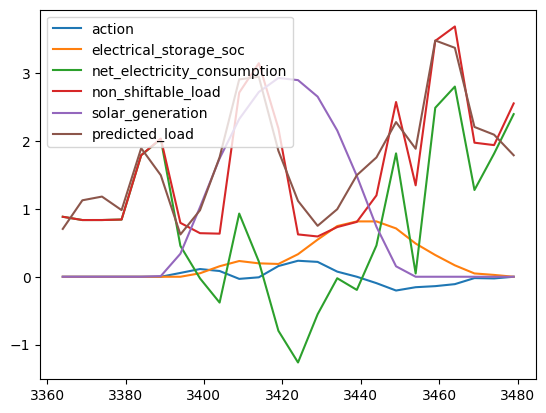

In [27]:
left_bound = 600
window_width = 24
right_bound = left_bound + window_width

df_known_building[left_bound:right_bound].plot(kind='line')
plt.legend(loc='upper left')
plt.show()

shift = 72
df_pred_building[left_bound + shift:right_bound + shift].plot(kind='line')
plt.legend(loc='upper left')
plt.show()